In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels

In [2]:
#loading the data into the project
life = pd.read_csv("all_data.csv")
print(life.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
#checking for unique countries
print(life.columns.unique())
print(life.Country.unique())
print(life.Year.unique())

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [7]:
#going to fix the cell name for this section
life = life.rename({"Life expectancy at birth (years)" : "LEABY"}, axis= "columns")
life.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We can see that the distribution of GDP are right skewed with most values being on the left-hand side. This abide by the power law distribution. This indicated the majority of GDPs are low values and approach high GDP with low frequency at a exponent decreasing rate.

<Figure size 576x432 with 0 Axes>

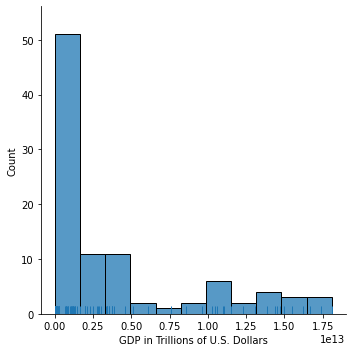

In [9]:
#Exploration
plt.figure(figsize=(8,6))
sns.displot(life.GDP, rug = True, kde =False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

We will make a distribution of LEABY. THe distribution of LEABY in the data is very left skewed meaning majority of the values are on the right hand side. This a directly opposite to the the GDP column. A further study might find a different modes or smaller groupings of distributions within the range.

<Figure size 576x432 with 0 Axes>

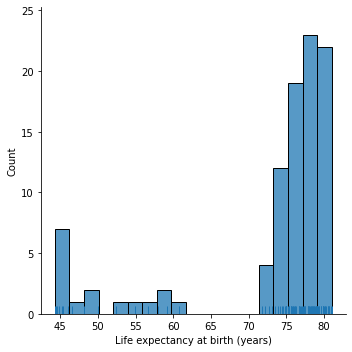

In [14]:
plt.figure(figsize= (8,6))
sns.displot(life.LEABY, rug = True, kde = False)
plt.xlabel("Life expectancy at birth (years)");

These last two graphs were not divided by the data by each country. We shall inspect this in the next graphs


In [19]:
lifeMeans = life.drop("Year", axis = 1).groupby("Country").mean().reset_index()
lifeMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now we want to see the average life expectancy distribution over the different countries. We find that the outlier and skewness of the overall life expectancy can be example by the Zimbawe life expectancy distriubtion. Where cmoe countries distribution are between the mi- 70s except for Zimbabwe

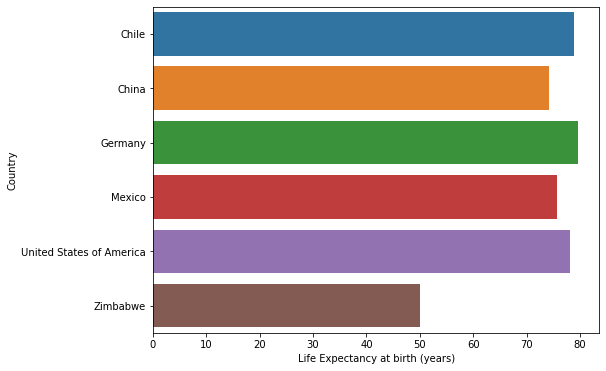

In [20]:
plt.figure(figsize= (8,6))
sns.barplot(x="LEABY", y="Country", data=lifeMeans)
plt.xlabel("Life Expectancy at birth (years)");

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

Text(0.5, 0, 'GDP')

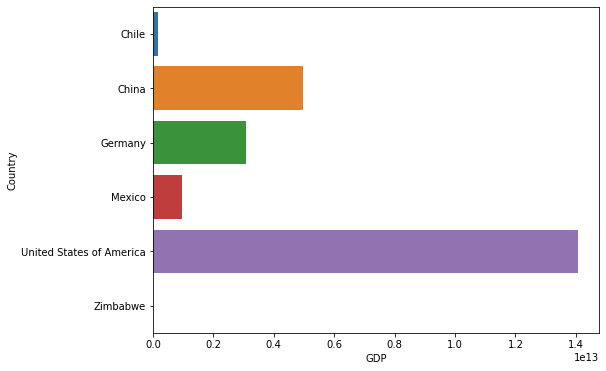

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x= "GDP", y="Country", data=lifeMeans)
plt.xlabel("GDP")

Next the data will explore GDP and LEABY where we find that china experience a massive boom that push it from developing country to a major country that could compete with the might of the USA economy

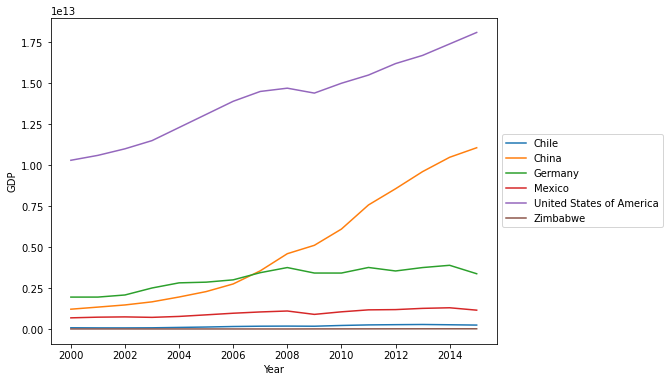

In [27]:
#Has life expectancy increased over time in the six nations?
plt.figure(figsize=(8,6))
sns.lineplot(x= life.Year, y= life.GDP, hue = life.Country)
plt.legend(loc= 'center left', bbox_to_anchor=(1, 0.5), ncol=1)

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.


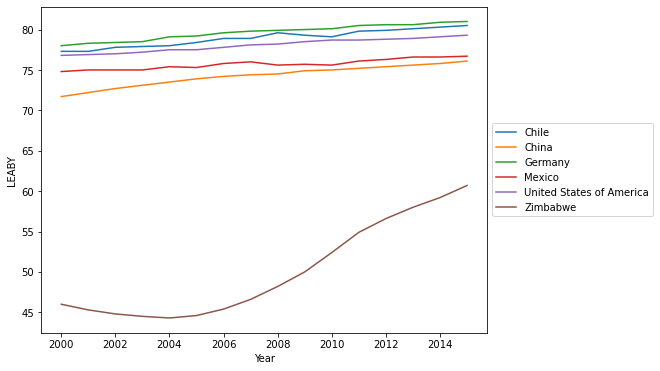

In [28]:
plt.figure(figsize=(8,6))
sns.lineplot(x= life.Year, y= life.LEABY, hue = life.Country)
plt.legend(loc= 'center left', bbox_to_anchor=(1, 0.5), ncol=1)

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

Violin Plots



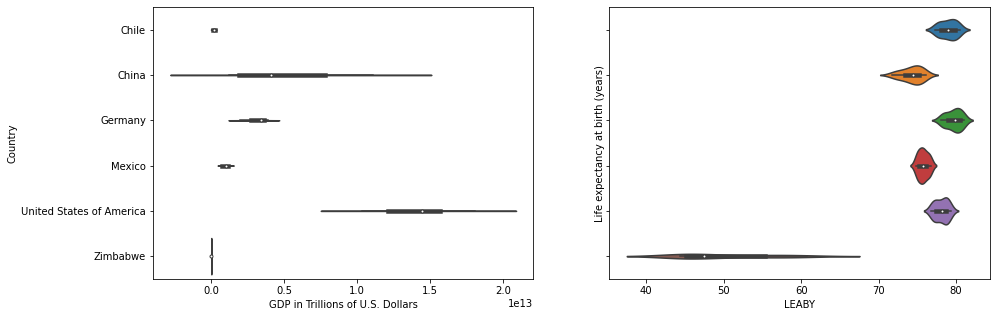

In [33]:
fig, axes =plt.subplots(1,2, sharey = True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x= life.GDP, y=life.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=life.LEABY, y=life.Country)
axes[1].set_ylabel("Life expectancy at birth (years)");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


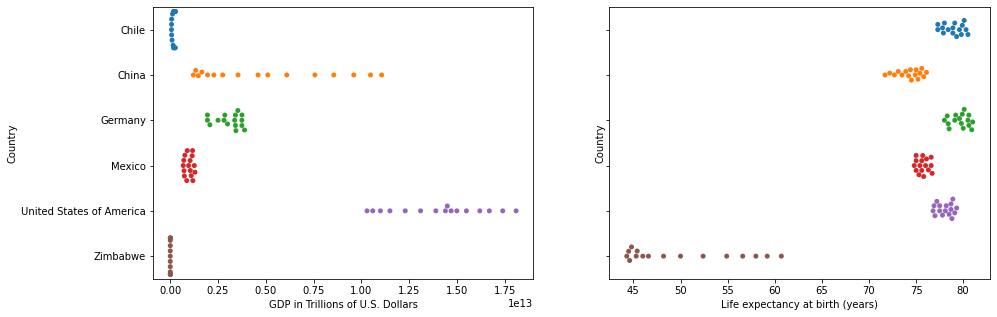

In [35]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=life.GDP, y=life.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=life.LEABY, y=life.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

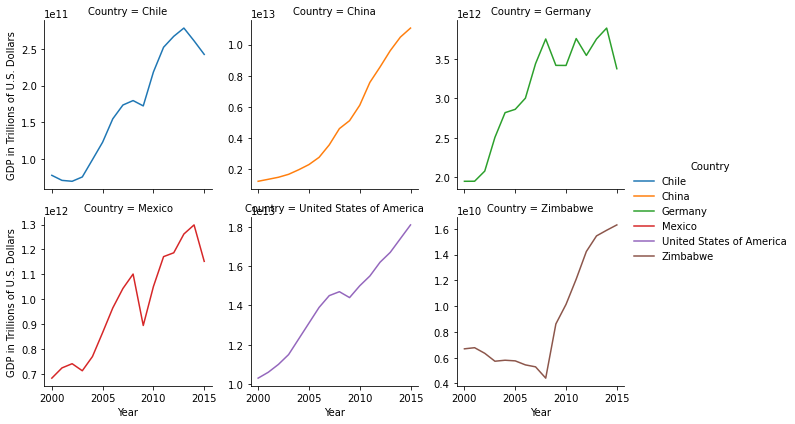

In [36]:
graphGDP = sns.FacetGrid(life, col= "Country", col_wrap=3, hue="Country", sharey= False)

graphGDP = (graphGDP.map(sns.lineplot,"Year", "GDP").add_legend().set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

graphGDP;

NameError: name 'set_axis_label' is not defined

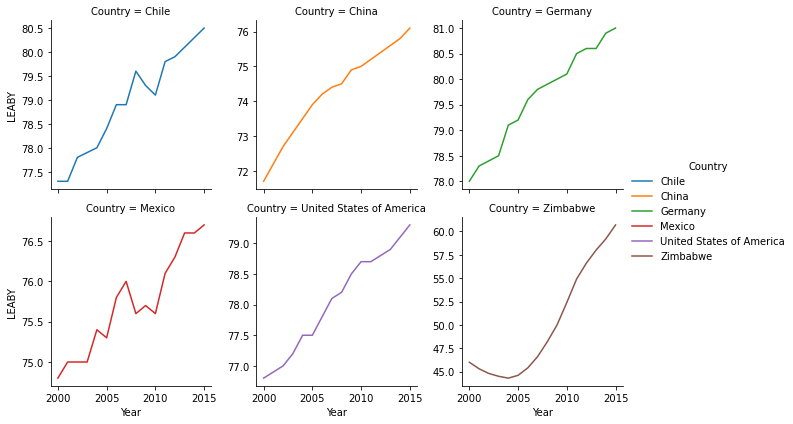

In [39]:
graphLEABY = sns.FacetGrid(life, col="Country", col_wrap=3, hue = "Country", sharey= False)

graphLEABY = (graphLEABY.map(sns.lineplot, "Year", "LEABY").add_legend(),set_axis_label("Year", "LEABY"))

graphLEABY;


This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.
The project was also able to answer some of the questions posed in the beginning:
Has life expectancy increased over time in the six nations?
Yes with Zimbabwe having the greatest increase.
Has GDP increased over time in the six nations?
GDP has also increased for all countries in our list, especially for China.
Is there a correlation between GDP and life expectancy of a country?
Yes there is a positive correlation between GDP and life expectancy for countries in our list.
What is the average life expectancy in these nations?
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
What is the distribution of that life expectancy?
the life expectancy had a left skew, or most of the observations were on the right side.
